Завдання 2

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np


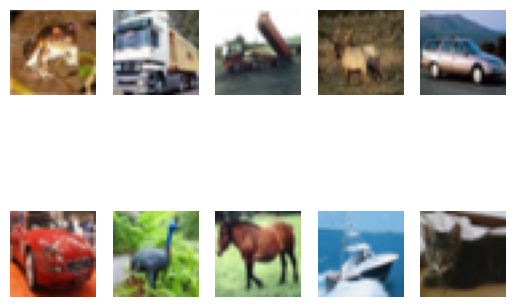

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

In [10]:
#1. Побудувати попередньо навчену модель VGG16 (або VGG19, Resnet та інші).
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in resnet.layers:
    layer.trainable = False


model = Sequential([
    resnet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#2. Зробити тонке налаштування (заморозити частину шарів, додати зверху шари).
for layer in resnet.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
#3. Повторити всі кроки як і для попереднього завдання

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 270s 332ms/step - accuracy: 0.1623 - loss: 4.7816 - val_accuracy: 0.3908 - val_loss: 1.8691 - learning_rate: 1.0000e-05
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 253s 324ms/step - accuracy: 0.3035 - loss: 2.4903 - val_accuracy: 0.4460 - val_loss: 1.6161 - learning_rate: 1.0000e-05
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 250s 320ms/step - accuracy: 0.3585 - loss: 1.9869 - val_accuracy: 0.4750 - val_loss: 1.5203 - learning_rate: 1.0000e-05
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 249s 318ms/step - accuracy: 0.4047 - loss: 1.7771 - val_accuracy: 0.4974 - val_loss: 1.4604 - learning_rate: 1.0000e-05
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 266s 324ms/step - accuracy: 0.4344 - loss: 1.6584 - val_accuracy: 0.5126 - val_loss: 1.4127 - learning_rate: 1.0000e-05
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 252s 311ms/step - accuracy: 0.4566 - loss: 1.5768 - val_accuracy: 0.5261 - val_loss: 1.3729 - learning_rate: 1.0000e-05
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 

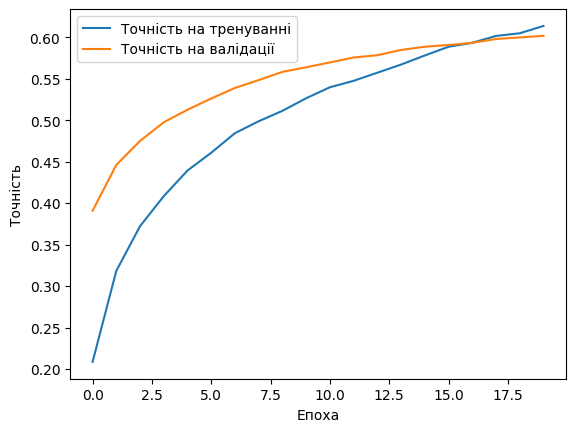

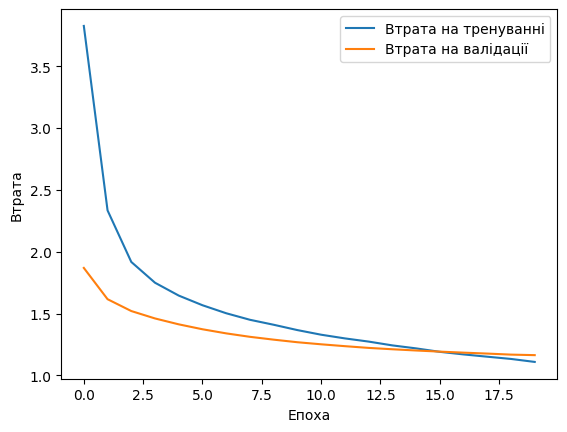

In [13]:

plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Втрата на тренуванні')
plt.plot(history.history['val_loss'], label='Втрата на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 146ms/step
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1000
           1       0.64      0.65      0.65      1000
           2       0.57      0.45      0.50      1000
           3       0.47      0.44      0.46      1000
           4       0.56      0.59      0.57      1000
           5       0.54      0.55      0.55      1000
           6       0.66      0.71      0.69      1000
           7       0.64      0.63      0.64      1000
           8       0.65      0.69      0.67      1000
           9       0.63      0.65      0.64      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



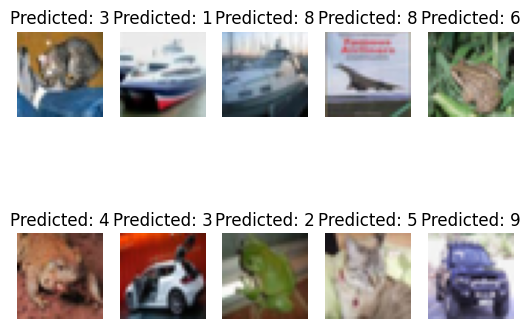

In [15]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()